# Path length and centralities

In [3]:
%pylab inline

import networkx as nx
from collections import Counter
from scipy import stats

A = np.loadtxt('Data/arenas-pgp/out.arenas-pgp', dtype=int, usecols=range(2), comments="%")
G=nx.Graph()
for n in A:
    G.add_edge(n[0], n[1])

Populating the interactive namespace from numpy and matplotlib


In [5]:
#Density
print(nx.density(G))

0.0004264030389019999


In [6]:
nx.average_shortest_path_length(G)

7.4855400514784

Compute all shortest paths and plot shortes path lengths

7.4855400514784


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Text(0.5, 0, 'Path length')

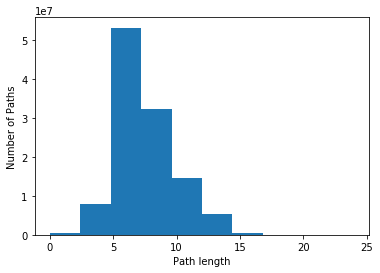

In [15]:
print(nx.average_shortest_path_length(G))
avg = 0
lengths = []
for node in G:
    path_length=nx.single_source_shortest_path_length(G, node)
    l = list(path_length.values())
    for length in l:
            lengths.append(length)
    avg += sum(l)

n=len(K)
print(avg/(n*(n-1)))
print(lengths)

plt.figure()
plt.hist(lengths)
plt.ylabel('Number of Paths')
plt.xlabel('Path length')

Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.
The degree of a node is the number of neighbors that it has. The degree centrality is the number of neighbors divided by all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible neighbors a node could have could also include the node itself.

In [4]:
#Betweenness centrality measures the number of times a node lies on the shortest path between other nodes.
# This measure shows which nodes act as ‘bridges’ between nodes in a network. It does this by identifying all the shortest paths and then counting how many times each node falls on one.
betweenness_centrality = nx.betweenness_centrality(G)

0.13118948721526424


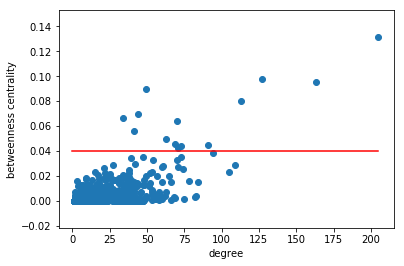

In [10]:
import matplotlib.lines as mlines

centralities = {} #node, degree, betweenness centrality
for deg in G.degree():
    bet_cen = betweenness_centrality[deg[0]]
    centralities[deg[0]] = (deg[1], bet_cen)
    
degs = [deg for deg, cen in centralities.values()]
cents = [cen for deg, cen in centralities.values()]
print(np.max(cents))
   
fig, ax = plt.subplots()
plt.xlabel('degree')
plt.ylabel('betweenness centrality')
ax.scatter(degs, cents)
l = mlines.Line2D([0,205], [0.04,0.04], color='red')
ax.add_line(l)

In [11]:
#Degree centrality assigns an importance score based purely on the number of links held by each node.
degree_centrality = nx.degree_centrality(G)

In [12]:
# This measure scores each node based on their ‘closeness’ to all other nodes within the network.
closeness_centrality = nx.closeness_centrality(G)

In [23]:
#Mean shortest distance
def msd(shortestpaths):
    msds = {}
    for node, sds in shortestpaths:
        msds[node] = np.mean(list(sds.values()))

    return msds

paths = nx.shortest_path_length(G) #dict[source][target] = Length
msds = msd(paths)

In [22]:
np.mean(list(msds.values()))

7.484839158215152

Text(0.5, 1.0, 'MSD Distribution: avg = 7.48,  std = 1.47')

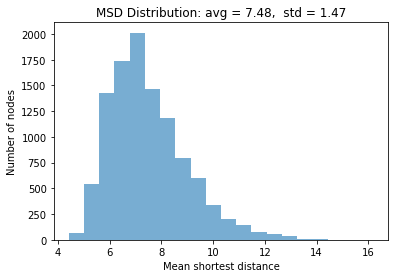

In [14]:
from scipy.stats import norm
from scipy import stats

msd_values = list(msds.values())
mean = np.mean(msd_values)
std = np.std(msd_values)

plt.figure()
plt.hist(msd_values, bins=20, alpha=0.6)
plt.ylabel('Number of nodes')
plt.xlabel('Mean shortest distance')

title = "MSD Distribution: avg = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

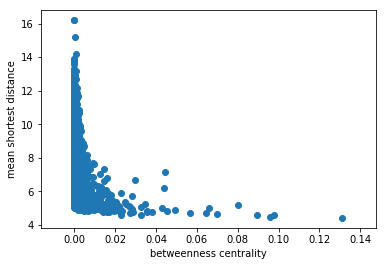

In [15]:
msd_centralties = {} #node, betweenness centrality
for node, ms in msds.items():
    bet_cen = betweenness_centrality[node]
    msd_centralties[node] = (ms, bet_cen)
    
msd_values = [ms for ms, cen in msd_centralties.values()]
cents = [cen for ms, cen in msd_centralties.values()]

fig, ax = plt.subplots()
plt.xlabel('betweenness centrality')
plt.ylabel('mean shortest distance')
ax.scatter(cents, msd_values)

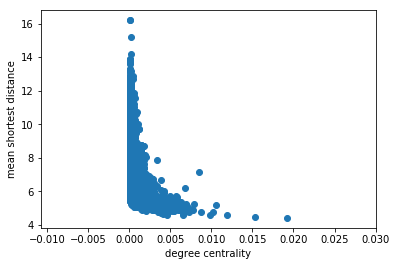

In [16]:
msd_deg_centralties = {} #node, betweenness centrality
for node, ms in msds.items():
    deg_cen = degree_centrality[node]
    msd_deg_centralties[node] = (ms, deg_cen)
    
msd_values = [ms for ms, cen in msd_deg_centralties.values()]
cents = [cen for ms, cen in msd_deg_centralties.values()]

fig, ax = plt.subplots()
plt.xlabel('degree centrality')
plt.ylabel('mean shortest distance')
ax.scatter(cents, msd_values)

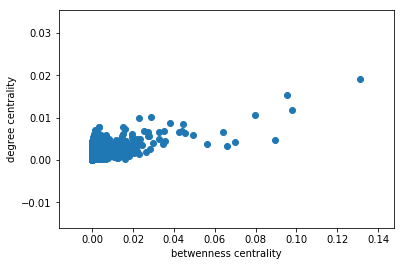

In [17]:
bet_deg_centralties = {} #node, betweenness centrality
for node, bet_cen in betweenness_centrality.items():
    deg_cen = degree_centrality[node]
    bet_deg_centralties[node] = (bet_cen, deg_cen)
    
bet_cen_values = [bet_cen for bet_cen, deg_cen in bet_deg_centralties.values()]
deg_cen_values = [deg_cen for bet_cen, deg_cen in bet_deg_centralties.values()]

fig, ax = plt.subplots()
plt.xlabel('betwenness centrality')
plt.ylabel('degree centrality')
ax.scatter(bet_cen_values, deg_cen_values)

In [18]:
inverted_msds = {}
for node, msd in msds.items():
    inverted_msds[node] = 1/msd

nx.set_node_attributes(G, betweenness_centrality, 'betweenness')
nx.set_node_attributes(G, msds, 'msd')
nx.set_node_attributes(G, inverted_msds, 'invertedmsd')
nx.write_gml(G, "output/pgp_msd.gml", stringizer=str)

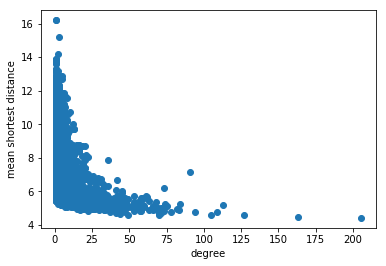

In [19]:
centralities = {} #node, degree, betweenness centrality
for deg in G.degree():
    msd = msds[deg[0]]
    centralities[deg[0]] = (deg[1], msd)
    
degs = [deg for deg, msd in centralities.values()]
msd_vals = [msd for deg, msd in centralities.values()]
   
fig, ax = plt.subplots()
plt.xlabel('degree')
plt.ylabel('mean shortest distance')
ax.scatter(degs, msd_vals)

In [26]:
#Median shortest distance
def mediansd(shortestpaths):
    msds = {}
    for node, sds in shortestpaths:
        msds[node] = np.median(list(sds.values()))

    return msds

paths = nx.shortest_path_length(G) #dict[source][target] = Length
mediansds = mediansd(paths)

Text(0.5, 1.0, 'MSD Distribution: avg = 7.33,  std = 1.54')

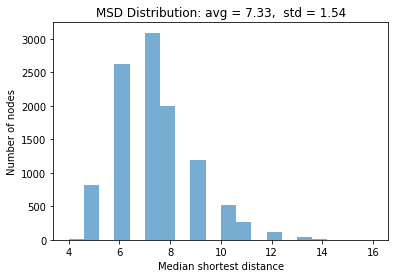

In [27]:
mediansd_values = list(mediansds.values())
mean = np.mean(mediansd_values)
std = np.std(mediansd_values)

plt.figure()
plt.hist(mediansd_values, bins=20, alpha=0.6)
plt.ylabel('Number of nodes')
plt.xlabel('Median shortest distance')

title = "MSD Distribution: avg = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

Links:
- https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/